# Kalorimetrie Laborversuch

Author: Philipp Schmidt

Datum: 12.12.23

Gruppe: 16

## Forschungsfrage

Wie kann man die spezifische Wärmekapazität von unterschiedlichen Proben experimentell bestimmen?

## Versuchsaufbau und Durchführung

Für die Bestimmung der spezifischen Wärmekapazität wird ein Kalorimeter verwendet, dies ist in diesem Fall ein mit 400ml Raumtemperatur warmen Wasser gefülltes Becherglas. Das Wasser darin wird dauerhaft durch einen Magnetrührer gemischt und dessen Temperatur von drei Temperatursensoren erfasst, je ein weiterer Temperartursensor erfasst dabei die Umgebungstemperatur und ein Heißwasserbad. Dieses Heißwasserbad wird durch einen elektischen Heizer auf 80°C erhitzt. Der Gesamtaufbau ist in Bild 1 zu sehen.
Im ersten Schritt wird die Kalorimeter Konstante des Becherglases bestimmt, dazu wird ein Tauchsieder eingelegt welcher mit bis zu 20V und 4A bestromt wird, dieser führt dem Kalorimeter über drei Minuten Energie zu, während der Temperaturverlauf des Wassers dabei erfasst wird (siehe Bild 2). 
Anschließend findet drei Mal die gleiche Messung für die drei unterschiedlichen Proben statt. 
Vor jeder Messung einer Probe wird das im Kalorimeter befindliche Wasser durch wieder exakt 400ml Raumtemperatur warmes Wasser getauscht. Danach wird die jeweilige Probe in das Heißwasserbad gelegt (siehe Bild 3) und verweilt dort für einige Minuten bis die Temperatur des Bades konstant bei 80°C liegt. Anschließend wird die Probe entnommen, abgetropft und möglichst schnell in das Kalorimeter gelegt und dieses abgedeckt (siehe Bild 4). Dabei wird die Kalorimeter Temperatur erfasst, bis diese konstant bleibt, dann ist der Versuch beendet und wird wieder von vorne durchgeführt für die nächste Probe.

![](figures/IMG_3319.jpeg)
![](figures/IMG_3323.jpeg)
![](figures/IMG_3320.jpeg)
![](figures/IMG_3321.jpeg)

## Versuchsauswertung

In [76]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [77]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Kalorimeterkonstante/Kalorimeterkonstante.h5"

# DONE #

In [78]:
#importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

#data_dict = utility.get_plot_data_from_dataset()

# DONE #

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

with h5.File("data/Kalorimeterkonstante/Kalorimeterkonstante.h5") as f:
    # save data from experiment in variable h5_data_....
    h5_data_temp_s_1 = f["RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/temperature"]
    h5_data_time_s_1 = f["RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/timestamp"]
    h5_data_temp_s_2 = f["RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/temperature"]
    h5_data_time_s_2 = f["RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/timestamp"]
    h5_data_temp_s_3 = f["RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/temperature"]
    h5_data_time_s_3 = f["RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/timestamp"]
    h5_data_temp_s_4 = f["RawData/1ee5ec04-c845-69e2-853a-25c11543466f/temperature"]
    h5_data_time_s_4 = f["RawData/1ee5ec04-c845-69e2-853a-25c11543466f/timestamp"]
    
    #safe in arrays for plotting
    temp_s_1_array = np.array(h5_data_temp_s_1)
    time_s_1_array = np.array(h5_data_time_s_1)
    temp_s_2_array = np.array(h5_data_temp_s_2)
    time_s_2_array = np.array(h5_data_time_s_2)
    temp_s_3_array = np.array(h5_data_temp_s_3)
    time_s_3_array = np.array(h5_data_time_s_3)
    temp_s_4_array = np.array(h5_data_temp_s_4)
    time_s_4_array = np.array(h5_data_time_s_4)
    
    #print(temp_s_1_array[72])
    index_to_delete = 72
    temp_s_1_array = np.delete(temp_s_1_array, index_to_delete, axis=0)
    #print("Shape of temp_s_1_array:", temp_s_1_array.shape)
    #print("Shape of temp_s_2_array:", temp_s_2_array.shape)
    #print("Shape of temp_s_3_array:", temp_s_3_array.shape)
    #print("Shape of temp_s_4_array:", temp_s_4_array.shape)
    #print(temp_s_1_array, '°C')
    #print(temp_s_2_array, '°C')
    #print(temp_s_3_array, '°C')
    #print(temp_s_4_array, '°C')
    
    #print(time_s_1_array[72])
    index_to_delete = 72
    time_s_1_array = np.delete(time_s_1_array, index_to_delete, axis=0)
    #print("Shape of time_s_1_array:", time_s_1_array.shape)
    #print("Shape of time_s_2_array:", time_s_2_array.shape)
    #print("Shape of time_s_3_array:", time_s_3_array.shape)
    #print("Shape of time_s_4_array:", time_s_4_array.shape)
    #print(time_s_1_array, 's')
    #print(time_s_2_array, 's')
    #print(time_s_3_array, 's')
    #print(time_s_4_array, 's')
# DONE #

# TODO: Use the temperature and time data for plotting

#plt.plot(time_s_1_array, temp_s_1_array, color='red')
#plt.xlabel("Zeit in s")
#plt.ylabel("Temperatur in °C")

#plt.plot(time_s_2_array, temp_s_2_array)
#plt.xlabel("Zeit in s")
#plt.ylabel("Temperatur in °C")

#plt.plot(time_s_3_array, temp_s_3_array, color='green')
#plt.xlabel("Zeit in s")
#plt.ylabel("Temperatur in °C")

#plt.plot(time_s_4_array, temp_s_4_array, color='black')
#plt.xlabel("Zeit in s")
#plt.ylabel("Temperatur in °C")

#plt.title("Kalorimeterkonstante Versuch")
#plt.legend(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4'])

# DONE #

In [79]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.




#index_calorimeter = []
#index_environment = []

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [80]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

av_temp_calorimeter = ((temp_s_1_array+temp_s_2_array+temp_s_3_array)/3)
#print(av_temp_calorimeter, '°C')
av_time_calorimeter = ((time_s_1_array+time_s_2_array+time_s_3_array)/3)
#print(av_time_calorimeter)

std_deviation_values_1 = np.std(temp_s_1_array, axis=0)
#print(std_deviation_values_1)
std_deviation_values_2 = np.std(temp_s_2_array, axis=0)
#print(std_deviation_values_2)
std_deviation_values_3 = np.std(temp_s_3_array, axis=0)
#print(std_deviation_values_3)

#av_temp_environment = ((temp_s_4_array)
#print(av_temp_environment, '°C')                      
#av_time_environment = ((time_s_4_array)
#print(av_time_environment)
std_deviation_values_4 = np.std(temp_s_4_array, axis=0)
#print(std_deviation_values_4)
                       
#mean_std_calorimeter = utility.cal_mean_and_standard_deviation()
#mean_std_environment = utility.cal_mean_and_standard_deviation()

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

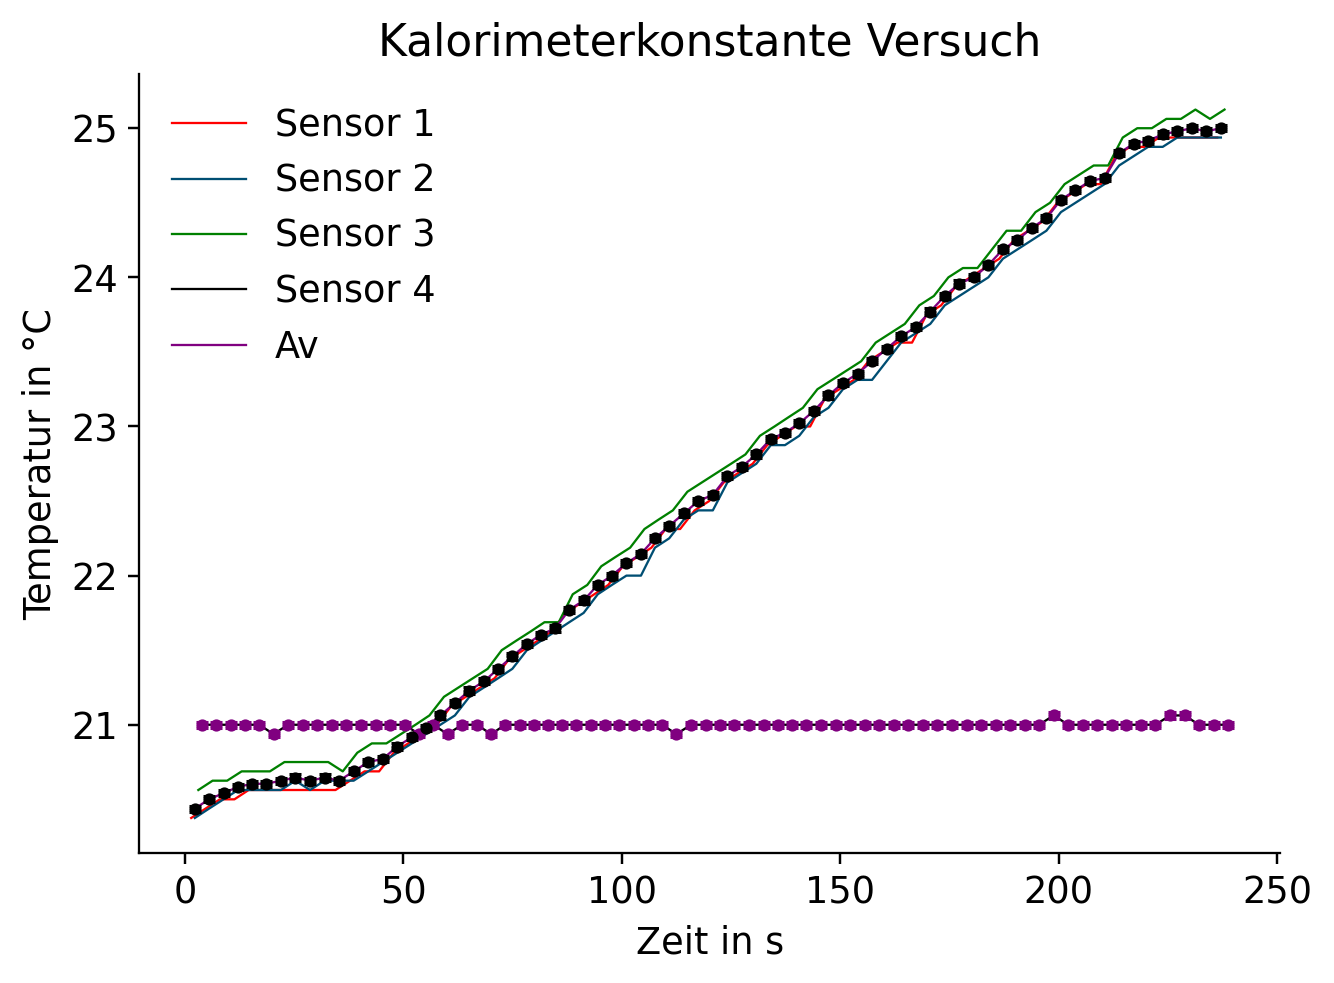

In [81]:
#importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

#utility.plot_temp_over_time()

# DONE #

plt.plot(time_s_1_array, temp_s_1_array, color='red')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_2_array, temp_s_2_array)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_3_array, temp_s_3_array, color='green')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_4_array, temp_s_4_array, color='black')
plt.errorbar(time_s_4_array, temp_s_4_array, yerr=std_deviation_values_4, fmt='.', color='purple', ecolor='purple', capsize=2)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(av_time_calorimeter, av_temp_calorimeter, color='purple')
plt.errorbar(av_time_calorimeter, av_temp_calorimeter, yerr=std_deviation_values_4, fmt='.', color='black', ecolor='black', capsize=2)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.title("Kalorimeterkonstante Versuch")
plt.legend(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Av'])

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [82]:
# Heat capacity of Water has been given
#water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

#water_mass = None

# DONE #

# Heat capacity of Water
water_heat_capa = 4.18 
print(water_heat_capa, 'J/K')

# Read mass from the metadata of the experiment.
import json
with open("data/Kalorimeterkonstante/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json") as jf:
          g = json.load(jf)
mass = g['calorimeter']['medium']['mass']['value']
print(mass, 'g')

# DONE #

4.18 J/K
400 g


In [83]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

#current = None
#heat_time = None
#voltage = None

# DONE #

import json
with open("data/Kalorimeterkonstante/actor_immersionHeater_1ee21744-0355-6023-94b4-d5c041dd32cd.json") as jf:
          g = json.load(jf)
current = g['actor']['power_supply']['current']
voltage = g['actor']['power_supply']['voltage']
heat_time = g['actor']['power_supply']['heat_time']
print(current, 'A')
print(voltage, 'V')
print(heat_time, 's')

4 A
12 V
180 s


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [84]:
#importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#temperature_end, temperature_start = utility.get_start_end_temperature() 

# DONE #

t_start = min(av_temp_calorimeter)
print(t_start, '°C')
t_end = max(av_temp_calorimeter)
print(t_end, '°C')

20.4375 °C
25.0 °C


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [85]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(t_end-t_start)

# DONE #

#### (Vii) Ergebnis

In [86]:
print(calorimeter_const, 'J/K')

1893.6986301369864 J/K


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [87]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/probe_PDC007/probe_PDC007.h5"


In [88]:
#importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

#data_dict = utility.get_plot_data_from_dataset()

# DONE #

with h5.File("data/probe_PDC007/probe_PDC007.h5") as f:
    # save data from experiment in variable h5_data_....
    h5_data_temp_s_5 = f["RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/temperature"]
    h5_data_time_s_5 = f["RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/timestamp"]
    h5_data_temp_s_6 = f["RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/temperature"]
    h5_data_time_s_6 = f["RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/timestamp"]
    h5_data_temp_s_7 = f["RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/temperature"]
    h5_data_time_s_7 = f["RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/timestamp"]
    h5_data_temp_s_8 = f["RawData/1ee5ec04-c845-69e2-853a-25c11543466f/temperature"]
    h5_data_time_s_8 = f["RawData/1ee5ec04-c845-69e2-853a-25c11543466f/timestamp"]
    h5_data_temp_s_9 = f["RawData/1ee5ec05-4aea-68f6-ad82-53b16fffae49/temperature"]
    h5_data_time_s_9 = f["RawData/1ee5ec05-4aea-68f6-ad82-53b16fffae49/timestamp"]    
    
    #safe in arrays for plotting
    temp_s_5_array = np.array(h5_data_temp_s_5)
    time_s_5_array = np.array(h5_data_time_s_5)
    temp_s_6_array = np.array(h5_data_temp_s_6)
    time_s_6_array = np.array(h5_data_time_s_6)
    temp_s_7_array = np.array(h5_data_temp_s_7)
    time_s_7_array = np.array(h5_data_time_s_7)
    temp_s_8_array = np.array(h5_data_temp_s_8)
    time_s_8_array = np.array(h5_data_time_s_8)
    temp_s_9_array = np.array(h5_data_temp_s_9)
    time_s_9_array = np.array(h5_data_time_s_9)
    
    #print(temp_s_5_array, '°C')
    #print(temp_s_6_array, '°C')
    #print(temp_s_7_array, '°C')
    #print(temp_s_8_array, '°C')
    #print(temp_s_9_array, '°C')
    #print("Shape of temp_s_5_array:", temp_s_5_array.shape)
    #print("Shape of temp_s_6_array:", temp_s_6_array.shape)
    #print("Shape of temp_s_7_array:", temp_s_7_array.shape)
    #print("Shape of temp_s_8_array:", temp_s_8_array.shape)
    #print("Shape of temp_s_9_array:", temp_s_9_array.shape)
    
    #print(time_s_5_array, 's')
    #print(time_s_6_array, 's')
    #print(time_s_7_array, 's')
    #print(time_s_8_array, 's')
    #print(time_s_9_array, 's')
    #print("Shape of time_s_5_array:", time_s_5_array.shape)
    #print("Shape of time_s_6_array:", time_s_6_array.shape)
    #print("Shape of time_s_7_array:", time_s_7_array.shape)
    #print("Shape of time_s_8_array:", time_s_8_array.shape)
    #print("Shape of time_s_9_array:", time_s_9_array.shape)

In [89]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

#index_calorimeter = []
#index_bath = []
#index_env = []

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [90]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

#mean_std_calorimeter = utility.cal_mean_and_standard_deviation()
#mean_std_environment = utility.cal_mean_and_standard_deviation()
#mean_std_heater = utility.cal_mean_and_standard_deviation()

# DONE #

importlib.reload(utility)

av_temp_calorimeter = ((temp_s_5_array+temp_s_6_array+temp_s_7_array)/3)
#print(av_temp_calorimeter, '°C')
av_time_calorimeter = ((time_s_5_array+time_s_6_array+time_s_7_array)/3)
#print(av_time_calorimeter)

std_deviation_values_5 = np.std(temp_s_5_array, axis=0)
#print(std_deviation_values_5)
std_deviation_values_6 = np.std(temp_s_6_array, axis=0)
#print(std_deviation_values_6)
std_deviation_values_7 = np.std(temp_s_7_array, axis=0)
#print(std_deviation_values_7)

#av_temp_environment = ((temp_s_8_array)
#print(av_temp_environment, '°C')                      
#av_time_environment = ((time_s_8_array)
#print(av_time_environment)
std_deviation_values_8 = np.std(temp_s_8_array, axis=0)
#print(std_deviation_values_8)

#av_temp_heater = ((temp_s_9_array)
#print(av_temp_heater, '°C')                      
#av_time_heater = ((time_s_9_array)
#print(av_time_heater)
std_deviation_values_9 = np.std(temp_s_9_array, axis=0)
#print(std_deviation_values_9)
                       

# DONE #

#### (iii) Daten ploten

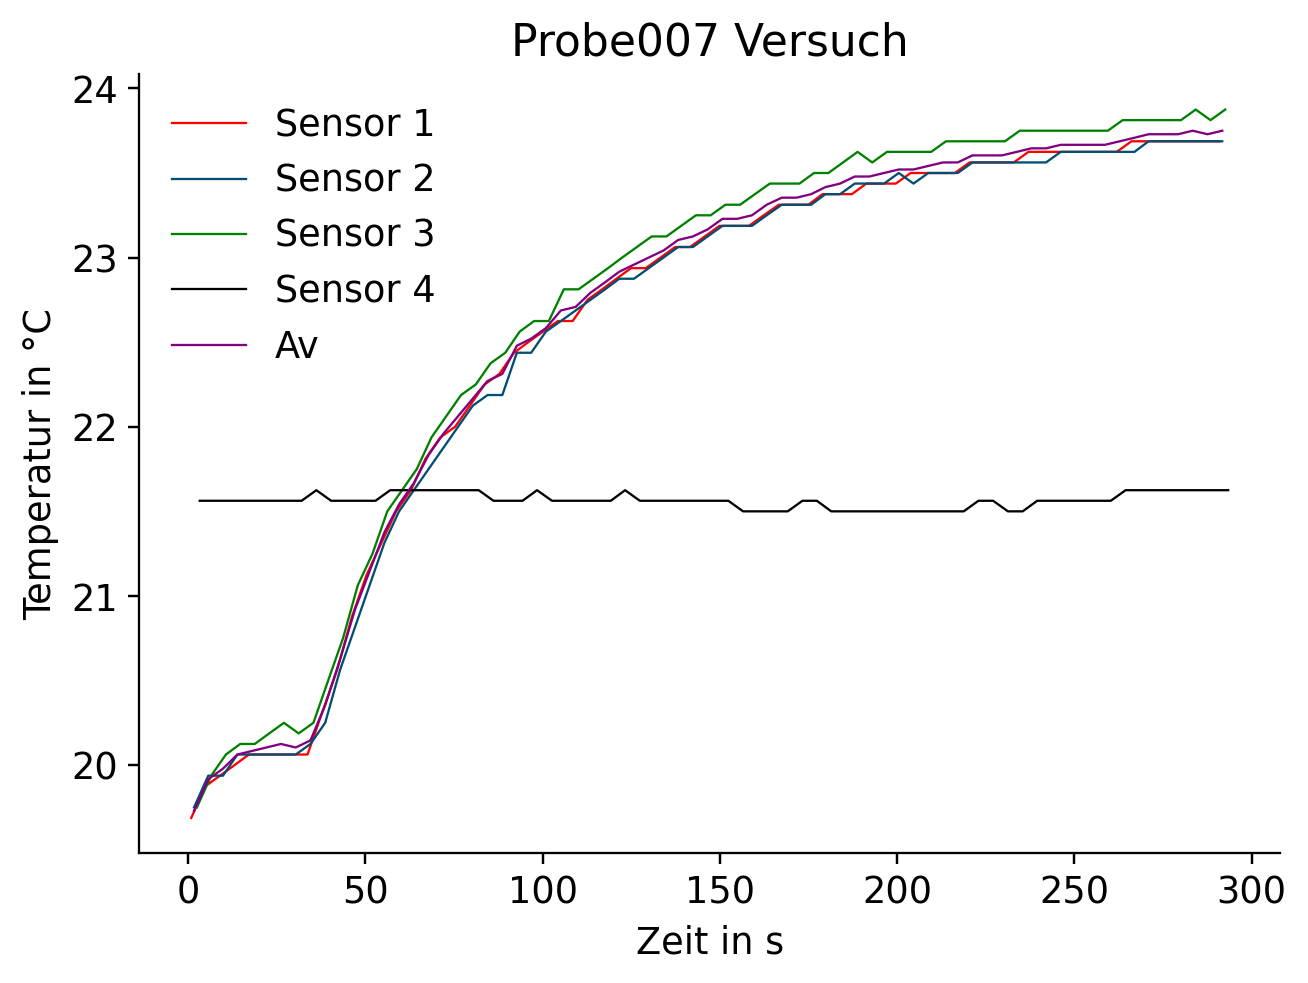

In [91]:
#importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

#utility.plot_temp_over_time()

# DONE #



plt.plot(time_s_5_array, temp_s_5_array, color='red')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_6_array, temp_s_6_array)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_7_array, temp_s_7_array, color='green')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_8_array, temp_s_8_array, color='black')
#plt.errorbar(time_s_8_array, temp_s_8_array, yerr=std_deviation_values_8, fmt='.', color='purple', ecolor='purple', capsize=2)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

#die Temperaturkurve des Heißwasserbades ist konstant bei 80°C +/- 0,5°C und 
#wird ausgeblendet um einen besser lesbaren Maßstab für die übrigen Temperaturen zu ermöglichen.
#plt.plot(time_s_9_array, temp_s_9_array, color='yellow')
#plt.errorbar(time_s_9_array, temp_s_9_array, yerr=std_deviation_values_9, fmt='.', color='purple', ecolor='purple', capsize=2)
#plt.xlabel("Zeit in s")
#plt.ylabel("Temperatur in °C")

plt.plot(av_time_calorimeter, av_temp_calorimeter, color='purple')
#plt.errorbar(av_time_calorimeter, av_temp_calorimeter, yerr=std_deviation_values, fmt='.', color='black', ecolor='black', capsize=2)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.title("Probe007 Versuch")
plt.legend(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Av'])

#### (iv) Metadaten auslesen

In [92]:
# TODO: Read mass of the sample from the metadata of the experiment.
import json
with open("data/probe_PDC007/probe_PDC007_1ee57b33-4e09-6211-b53e-6567f0eab32f.json") as jf:
          g = json.load(jf)
mass_p1 = g['probe']['mass']['value']

print(mass_p1, 'g')

# DONE #

110 g


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [93]:
#importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#temperature_mix, temperature_start_water = utility.get_start_end_temperature() 

# DONE #
t_start_p1 = min(av_temp_calorimeter)
print(t_start_p2, '°C')
t_end_p1 = max(av_temp_calorimeter)
print(t_end_p2, '°C')

C=1893.6986301369864 

20.1875 °C
27.458333333333332 °C


In [94]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
import statistics

temperature_start_sample_p1 = statistics.mean(temp_s_9_array)
print(temperature_start_sample_p1, '°C')

# DONE #

79.50264084507042 °C


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [95]:
# TODO: Calulate specific heat capacity of the sample.
print(C)
print(temperature_start_sample_p1)
print(t_start_p1)
print(t_end_p1)
print(mass_p1)
sample_heat_capa_p1 = (C*(temperature_start_sample_p1-t_start_p1)/(mass_p1*(t_end_p1-temperature_start_sample_p1)))

1893.6986301369864
79.50264084507042
19.729166666666668
23.75
110


#### (Vii) Ergebnis

In [96]:
print(sample_heat_capa_p1, 'J/Kkg')

-18.457005224644575 J/Kkg


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [97]:

# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/probe_PDC015/probe_PDC015.h5"

In [98]:
#importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

#data_dict = utility.get_plot_data_from_dataset()

# DONE #

with h5.File("data/probe_PDC015/probe_PDC015.h5") as f:
    # save data from experiment in variable h5_data_....
    h5_data_temp_s_10 = f["RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/temperature"]
    h5_data_time_s_10 = f["RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/timestamp"]
    h5_data_temp_s_11 = f["RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/temperature"]
    h5_data_time_s_11 = f["RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/timestamp"]
    h5_data_temp_s_12 = f["RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/temperature"]
    h5_data_time_s_12 = f["RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/timestamp"]
    h5_data_temp_s_13 = f["RawData/1ee5ec04-c845-69e2-853a-25c11543466f/temperature"]
    h5_data_time_s_13 = f["RawData/1ee5ec04-c845-69e2-853a-25c11543466f/timestamp"]
    h5_data_temp_s_14 = f["RawData/1ee5ec05-4aea-68f6-ad82-53b16fffae49/temperature"]
    h5_data_time_s_14 = f["RawData/1ee5ec05-4aea-68f6-ad82-53b16fffae49/timestamp"]    
    
    #safe in arrays for plotting
    temp_s_10_array = np.array(h5_data_temp_s_10)
    time_s_10_array = np.array(h5_data_time_s_10)
    temp_s_11_array = np.array(h5_data_temp_s_11)
    time_s_11_array = np.array(h5_data_time_s_11)
    temp_s_12_array = np.array(h5_data_temp_s_12)
    time_s_12_array = np.array(h5_data_time_s_12)
    temp_s_13_array = np.array(h5_data_temp_s_13)
    time_s_13_array = np.array(h5_data_time_s_13)
    temp_s_14_array = np.array(h5_data_temp_s_14)
    time_s_14_array = np.array(h5_data_time_s_14)
  
    #print(temp_s_10_array, '°C')
    #print(temp_s_11_array, '°C')
    #print(temp_s_12_array, '°C')
    #print(temp_s_13_array, '°C')
    #print(temp_s_14_array, '°C')
    #print("Shape of temp_s_10_array:", temp_s_10_array.shape)
    #print("Shape of temp_s_11_array:", temp_s_11_array.shape)
    #print("Shape of temp_s_12_array:", temp_s_12_array.shape)
    #print("Shape of temp_s_13_array:", temp_s_13_array.shape)
    #print("Shape of temp_s_14_array:", temp_s_14_array.shape)
    
    #print(time_s_10_array, 's')
    #print(time_s_11_array, 's')
    #print(time_s_12_array, 's')
    #print(time_s_13_array, 's')
    #print(time_s_14_array, 's')
    #print("Shape of time_s_10_array:", time_s_10_array.shape)
    #print("Shape of time_s_11_array:", time_s_11_array.shape)
    #print("Shape of time_s_12_array:", time_s_12_array.shape)
    #print("Shape of time_s_13_array:", time_s_13_array.shape)
    #print("Shape of time_s_14_array:", time_s_14_array.shape)

In [99]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

#index_calorimeter = []
#index_bath = []
#index_env = []

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [100]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

#mean_std_calorimeter = utility.cal_mean_and_standard_deviation()
#mean_std_environment = utility.cal_mean_and_standard_deviation()
#mean_std_heater = utility.cal_mean_and_standard_deviation()

# DONE #

importlib.reload(utility)

av_temp_calorimeter = ((temp_s_10_array+temp_s_11_array+temp_s_12_array)/3)
#print(av_temp_calorimeter, '°C')
av_time_calorimeter = ((time_s_10_array+time_s_11_array+time_s_12_array)/3)
#print(av_time_calorimeter)

std_deviation_values_10 = np.std(temp_s_10_array, axis=0)
#print(std_deviation_values_10)
std_deviation_values_11 = np.std(temp_s_11_array, axis=0)
#print(std_deviation_values_11)
std_deviation_values_12 = np.std(temp_s_12_array, axis=0)
#print(std_deviation_values_12)

#av_temp_environment = ((temp_s_13_array)
#print(av_temp_environment, '°C')                      
#av_time_environment = ((time_s_13_array)
#print(av_time_environment)
std_deviation_values_13 = np.std(temp_s_13_array, axis=0)
#print(std_deviation_values_13)

#av_temp_heater = ((temp_s_14_array)
#print(av_temp_heater, '°C')                      
#av_time_heater = ((time_s_14_array)
#print(av_time_heater)
std_deviation_values_14 = np.std(temp_s_14_array, axis=0)
#print(std_deviation_values_14)
                       

# DONE #

#### (iii) Daten ploten

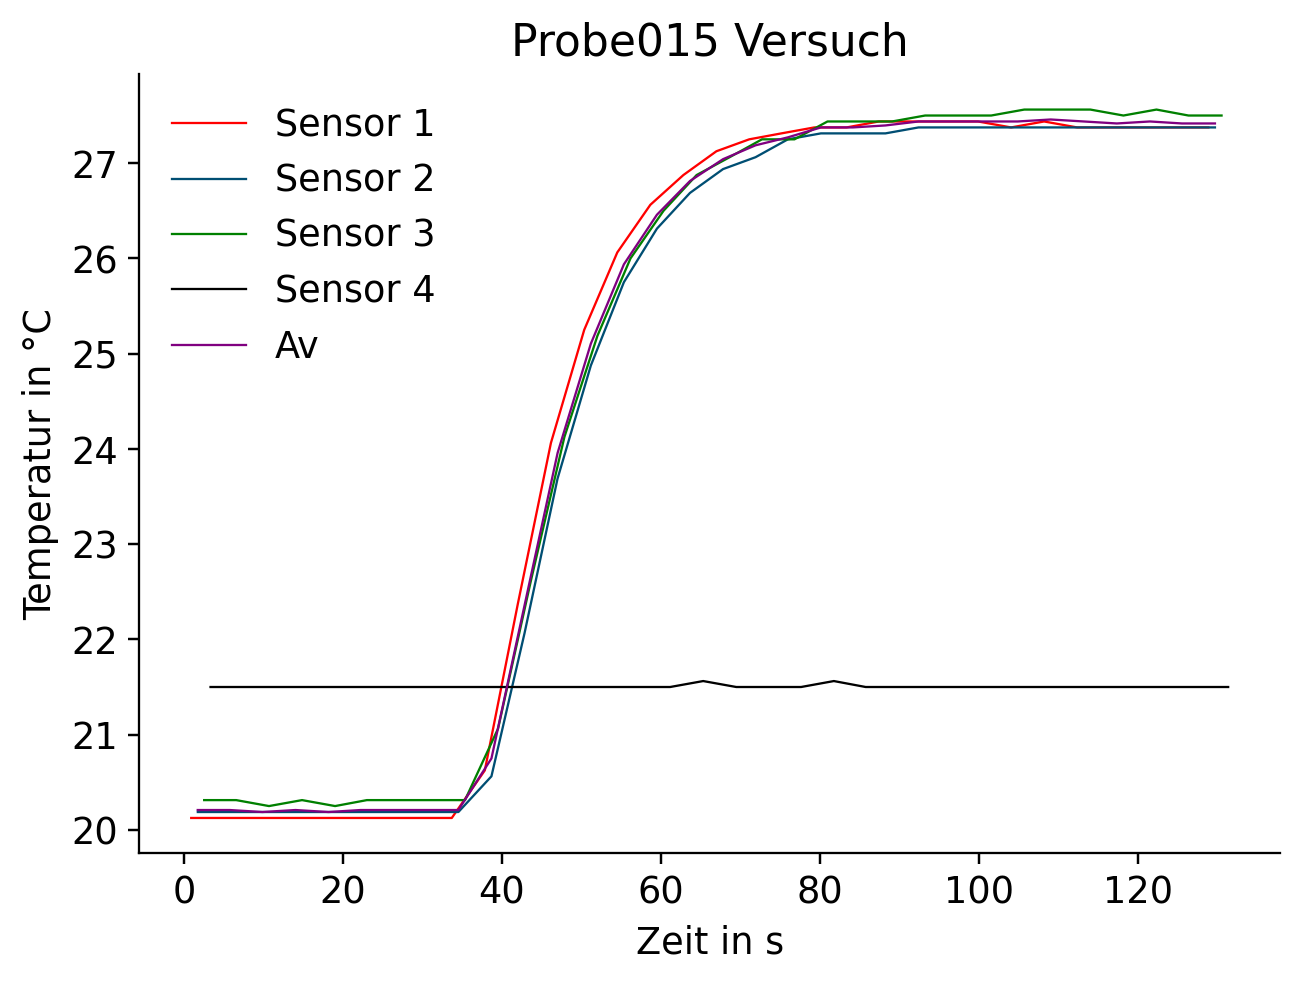

In [101]:
#importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

#utility.plot_temp_over_time()

# DONE #



plt.plot(time_s_10_array, temp_s_10_array, color='red')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_11_array, temp_s_11_array)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_12_array, temp_s_12_array, color='green')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_13_array, temp_s_13_array, color='black')
#plt.errorbar(time_s_13_array, temp_s_13_array, yerr=std_deviation_values_13, fmt='.', color='purple', ecolor='purple', capsize=2)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

#die Temperaturkurve des Heißwasserbades ist konstant bei 80°C +/- 0,5°C und 
#wird ausgeblendet um einen besser lesbaren Maßstab für die übrigen Temperaturen zu ermöglichen.
#plt.plot(time_s_14_array, temp_s_14_array, color='yellow')
#plt.errorbar(time_s_14_array, temp_s_14_array, yerr=std_deviation_values_14, fmt='.', color='purple', ecolor='purple', capsize=2)
#plt.xlabel("Zeit in s")
#plt.ylabel("Temperatur in °C")

plt.plot(av_time_calorimeter, av_temp_calorimeter, color='purple')
#plt.errorbar(av_time_calorimeter, av_temp_calorimeter, yerr=std_deviation_values_4, fmt='.', color='black', ecolor='black', capsize=2)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.title("Probe015 Versuch")
plt.legend(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Av'])

#### (iv) Metadaten auslesen

In [102]:
# TODO: Read mass of the sample from the metadata of the experiment.
import json
with open("data/probe_PDC015/probe_PDC015_1ee57b3b-1882-62e4-8374-424a3fe06b1b.json") as jf:
          g = json.load(jf)
mass_p2 = g['probe']['mass']['value']

print(mass_p2, 'g')

# DONE #

679 g


#### (v) Anfangs- und Endwert der Temperatur

In [103]:
#importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#temperature_mix, temperature_start_water = utility.get_start_end_temperature() 

# DONE #
t_start_p2 = min(av_temp_calorimeter)
print(t_start_p2, '°C')
t_end_p2 = max(av_temp_calorimeter)
print(t_end_p2, '°C')

C=1893.6986301369864 

20.1875 °C
27.458333333333332 °C


In [104]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
import statistics

temperature_start_sample_p2 = statistics.mean(temp_s_14_array)
print(temperature_start_sample_p2, '°C')

# DONE #

79.44140625 °C


#### (vi) spezifische Wärmekapazität bestimmen

In [105]:
# TODO: Calulate specific heat capacity of the sample.
print(C)
print(temperature_start_sample_p2)
print(t_start_p2)
print(t_end_p2)
print(mass_p2)
sample_heat_capa_p2 = (C*(temperature_start_sample_p2-t_start_p2)/(mass_p2*(t_end_p2-temperature_start_sample_p2)))

1893.6986301369864
79.44140625
20.1875
27.458333333333332
679


#### (Vii) Ergebnis

In [106]:
print(sample_heat_capa_p2, 'J/Kkg')

-3.179040992704912 J/Kkg


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [107]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/probe_PDC019/probe_PDC019.h5"

In [108]:
#importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

#data_dict = utility.get_plot_data_from_dataset()

# DONE #

with h5.File("data/probe_PDC019/probe_PDC019.h5") as f:
    # save data from experiment in variable h5_data_....
    h5_data_temp_s_15 = f["RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/temperature"]
    h5_data_time_s_15 = f["RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/timestamp"]
    h5_data_temp_s_16 = f["RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/temperature"]
    h5_data_time_s_16 = f["RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/timestamp"]
    h5_data_temp_s_17 = f["RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/temperature"]
    h5_data_time_s_17 = f["RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/timestamp"]
    h5_data_temp_s_18 = f["RawData/1ee5ec04-c845-69e2-853a-25c11543466f/temperature"]
    h5_data_time_s_18 = f["RawData/1ee5ec04-c845-69e2-853a-25c11543466f/timestamp"]
    h5_data_temp_s_19 = f["RawData/1ee5ec05-4aea-68f6-ad82-53b16fffae49/temperature"]
    h5_data_time_s_19 = f["RawData/1ee5ec05-4aea-68f6-ad82-53b16fffae49/timestamp"]    
    
    #safe in arrays for plotting
    temp_s_15_array = np.array(h5_data_temp_s_15)
    time_s_15_array = np.array(h5_data_time_s_15)
    temp_s_16_array = np.array(h5_data_temp_s_16)
    time_s_16_array = np.array(h5_data_time_s_16)
    temp_s_17_array = np.array(h5_data_temp_s_17)
    time_s_17_array = np.array(h5_data_time_s_17)
    temp_s_18_array = np.array(h5_data_temp_s_18)
    time_s_18_array = np.array(h5_data_time_s_18)
    temp_s_19_array = np.array(h5_data_temp_s_19)
    time_s_19_array = np.array(h5_data_time_s_19)
    
    index_to_delete = 40
    temp_s_15_array = np.delete(temp_s_15_array, index_to_delete, axis=0)
    #print(temp_s_15_array, '°C')
    #print(temp_s_16_array, '°C')
    #print(temp_s_17_array, '°C')
    #print(temp_s_18_array, '°C')
    #print(temp_s_19_array, '°C')
    #print("Shape of temp_s_15_array:", temp_s_15_array.shape)
    #print("Shape of temp_s_16_array:", temp_s_16_array.shape)
    #print("Shape of temp_s_17_array:", temp_s_17_array.shape)
    #print("Shape of temp_s_18_array:", temp_s_18_array.shape)
    #print("Shape of temp_s_19_array:", temp_s_19_array.shape)
    
    index_to_delete = 40
    time_s_15_array = np.delete(time_s_15_array, index_to_delete, axis=0)
    #print(time_s_15_array, 's')
    #print(time_s_16_array, 's')
    #print(time_s_17_array, 's')
    #print(time_s_18_array, 's')
    #print(time_s_19_array, 's')
    #print("Shape of time_s_15_array:", time_s_15_array.shape)
    #print("Shape of time_s_16_array:", time_s_16_array.shape)
    #print("Shape of time_s_17_array:", time_s_17_array.shape)
    #print("Shape of time_s_18_array:", time_s_18_array.shape)
    #print("Shape of time_s_19_array:", time_s_19_array.shape)

In [109]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

#index_calorimeter = []
#index_bath = []
#index_env = []

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [110]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

#mean_std_calorimeter = utility.cal_mean_and_standard_deviation()
#mean_std_environment = utility.cal_mean_and_standard_deviation()
#mean_std_heater = utility.cal_mean_and_standard_deviation()

# DONE #

importlib.reload(utility)

av_temp_calorimeter = ((temp_s_15_array+temp_s_16_array+temp_s_17_array)/3)
#print(av_temp_calorimeter, '°C')
av_time_calorimeter = ((time_s_15_array+time_s_16_array+time_s_17_array)/3)
#print(av_time_calorimeter)

std_deviation_values_15 = np.std(temp_s_15_array, axis=0)
#print(std_deviation_values_15)
std_deviation_values_16 = np.std(temp_s_16_array, axis=0)
#print(std_deviation_values_16)
std_deviation_values_17 = np.std(temp_s_17_array, axis=0)
#print(std_deviation_values_17)

#av_temp_environment = ((temp_s_18_array)
#print(av_temp_environment, '°C')                      
#av_time_environment = ((time_s_18_array)
#print(av_time_environment)
std_deviation_values_18 = np.std(temp_s_18_array, axis=0)
#print(std_deviation_values_18)

#av_temp_heater = ((temp_s_19_array)
#print(av_temp_heater, '°C')                      
#av_time_heater = ((time_s_19_array)
#print(av_time_heater)
std_deviation_values_19 = np.std(temp_s_19_array, axis=0)
#print(std_deviation_values_19)
                       

# DONE #

#### (iii) Daten ploten

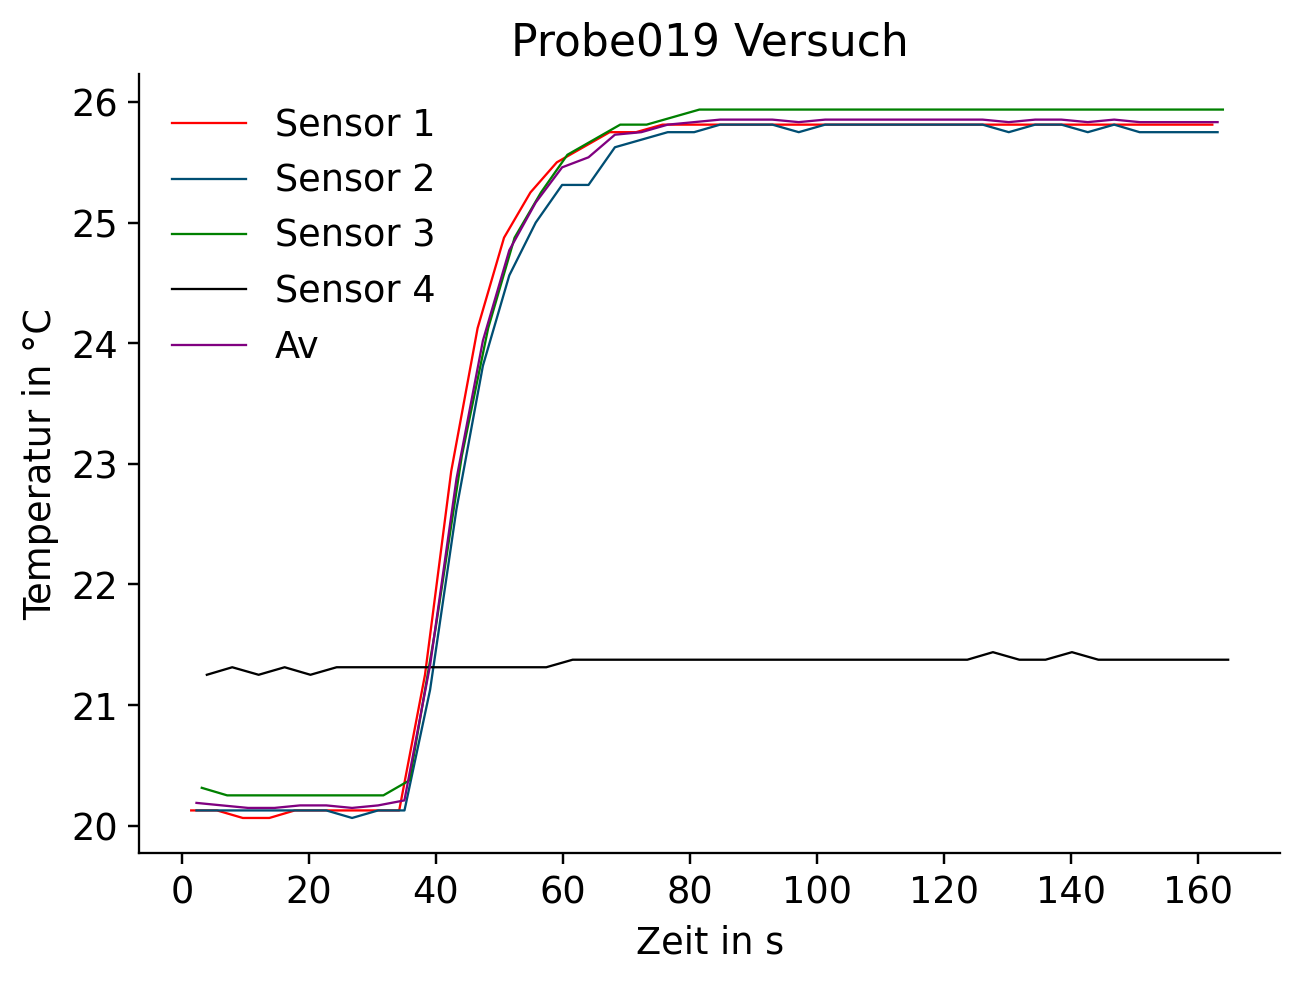

In [111]:
#importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

#utility.plot_temp_over_time()

# DONE #



plt.plot(time_s_15_array, temp_s_15_array, color='red')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_16_array, temp_s_16_array)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_17_array, temp_s_17_array, color='green')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_18_array, temp_s_18_array, color='black')
#plt.errorbar(time_s_18_array, temp_s_18_array, yerr=std_deviation_values_18, fmt='.', color='purple', ecolor='purple', capsize=2)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

#die Temperaturkurve des Heißwasserbades ist konstant bei 80°C +/- 0,5°C und 
#wird ausgeblendet um einen besser lesbaren Maßstab für die übrigen Temperaturen zu ermöglichen.
#plt.plot(time_s_19_array, temp_s_19_array, color='yellow')
#plt.errorbar(time_s_19_array, temp_s_19_array, yerr=std_deviation_values_19, fmt='.', color='purple', ecolor='purple', capsize=2)
#plt.xlabel("Zeit in s")
#plt.ylabel("Temperatur in °C")

plt.plot(av_time_calorimeter, av_temp_calorimeter, color='purple')
#plt.errorbar(av_time_calorimeter, av_temp_calorimeter, yerr=std_deviation_values, fmt='.', color='black', ecolor='black', capsize=2)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.title("Probe019 Versuch")
plt.legend(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Av'])

#### (iv) Metadaten auslesen

In [112]:
# TODO: Read mass of the sample from the metadata of the experiment.
import json
with open("data/probe_PDC019/probe_PDC019_1ee57b5f-6253-6438-a83f-4c0437beda63.json") as jf:
          g = json.load(jf)
mass_p3 = g['probe']['mass']['value']

print(mass_p3, 'g')

# DONE #

225 g


#### (v) Anfangs- und Endwert der Temperatur

In [113]:
#importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#temperature_mix, temperature_start_water = utility.get_start_end_temperature() 

# DONE #
t_start_p3 = min(av_temp_calorimeter)
print(t_start_p3, '°C')
t_end_p3 = max(av_temp_calorimeter)
print(t_end_p3, '°C')

C=1893.6986301369864 

20.145833333333332 °C
25.854166666666668 °C


In [114]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
import statistics

temperature_start_sample_p3 = statistics.mean(temp_s_19_array)
print(temperature_start_sample_p3, '°C')

# DONE #

79.359375 °C


#### (vi) spezifische Wärmekapazität bestimmen

In [115]:
# TODO: Calulate specific heat capacity of the sample.
print(C)
print(temperature_start_sample_p3)
print(t_start_p3)
print(t_end_p3)
print(mass_p3)
sample_heat_capa_p3 = (C*(temperature_start_sample_p3-t_start_p3)/(mass_p3*(t_end_p3-temperature_start_sample_p3)))

1893.6986301369864
79.359375
20.145833333333332
25.854166666666668
225


#### (Vii) Ergebnis

In [116]:
print(sample_heat_capa_p3, 'J/Kkg')

-9.314366560034351 J/Kkg


## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?
Die Ergebnisse sind vom Zahlenwert, nah an den Literaturwerten dran, die kleinen Abwechungen lassen sich durch aus dem Heißwasserbad transportiertes Wasser, die Ungenauigkeit der Sensoren und den Wärmetransport in das Kalorimeter durch dessen Wände erklären. Die Werte sind allerdings um den Faktor -10 falsch was auf prinzipielle Fehler hinweißt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.
Der Versuch vor Ort war interessant.